# Group Problem (35pt)

In this homework you will implement k-means for image segmentation.

**Step 1.** Take **three** photos. Do not use very large photos. You may use the PNG and JPEG
format. For each photo,

* Load your photo into computer and get the pixels each of which is given by (R,G,B).
Use the libraries for processing image.

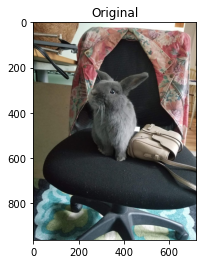

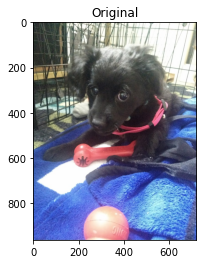

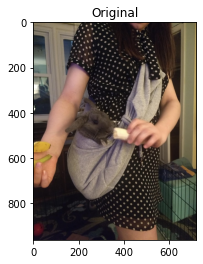

In [24]:
from PIL import Image
from matplotlib import pyplot as plt
from numpy import random

img0 = Image.open("images_original/20210420_185512.jpg")
img1 = Image.open("images_original/IMG_20210516_101659172.jpg")
img2 = Image.open("images_original/IMG_20210521_204633847.jpg")
# img0 = cv.imread("images_original/20210420_185512.jpg")
# img1 = cv.imread("images_original/IMG_20210516_101659172.jpg")
# img2 = cv.imread("images_original/IMG_20210521_204633847.jpg")

images = [img0, img1, img2]

for i in images:
    plt.plot()
    plt.imshow(i)
    plt.title("Original")
    plt.show()

for i in images:
    vectorized_image = i.reshape((-1,3))


* Apply K-means to the pixels, and rewrite the image where each pixel is replaced by
the mean of its cluster. Now you have a new photo.


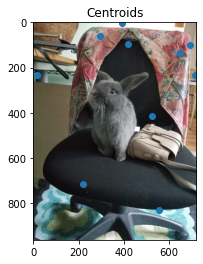

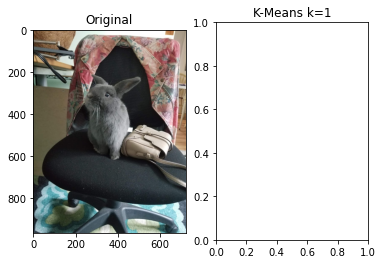

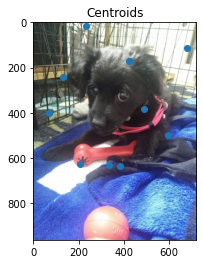

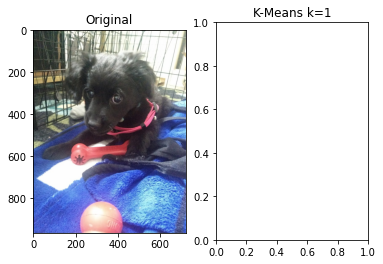

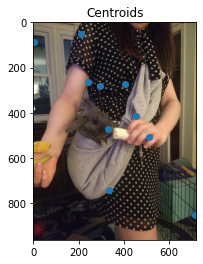

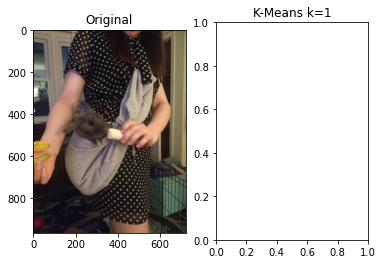

In [45]:
def k_means(img, cluster_count):
    img_x = img.size[0]
    img_y = img.size[1]
    x_points = ([])
    y_points = ([])
    plt.imshow(img)
    for k in range(0, cluster_count):
        random_x = random.randint(0, img_x)
        random_y = random.randint(0, img_y)
        x_points.append(random_x)
        y_points.append(random_y)

    plt.plot()
    plt.plot(x_points, y_points, 'o')
    plt.title("Centroids")
    plt.show()
    new_image = img
    return new_image
    # , \centroids


for i in images:
    k_means_img = k_means(i, 10)
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(i)
    ax[0].set_title('Original')
    # ax[1].imshow(k_means_img)
    ax[1].set_title('K-Means k=1')
    # for c in centroids:
    #      ax[1].plot(c)
    plt.show()

* Try different k from {1, 2, 5, 10, 20}. Now you have many new photos.


* **Step 2.** Questions:
    * What did you find concerning the relationship between k and the size of the new
image?
    * For each of your photos, which k is the best you think? Why?
* Step 3. Take a new photo of which you believe k=2 is the best, and verify it use your program in step 1.

### What to Turn in
Please upload.
* Your **code and a Readme file** for compiling the code.
* Your original **photos** and produced photos.
* A pdf **report** of (a) your results in step 1, (b) your answers to step 2, and (c) your findings
in step 3. You should also show your photos in your report.